In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## creando los filtros de la imagen

from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

In [2]:
## abriendo el dataset de digits (NMIST)

digits = datasets.load_digits()

In [3]:
## dataset
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
## target de la clasificación
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
## structura de la imagen
digits.images.shape

(1797, 8, 8)

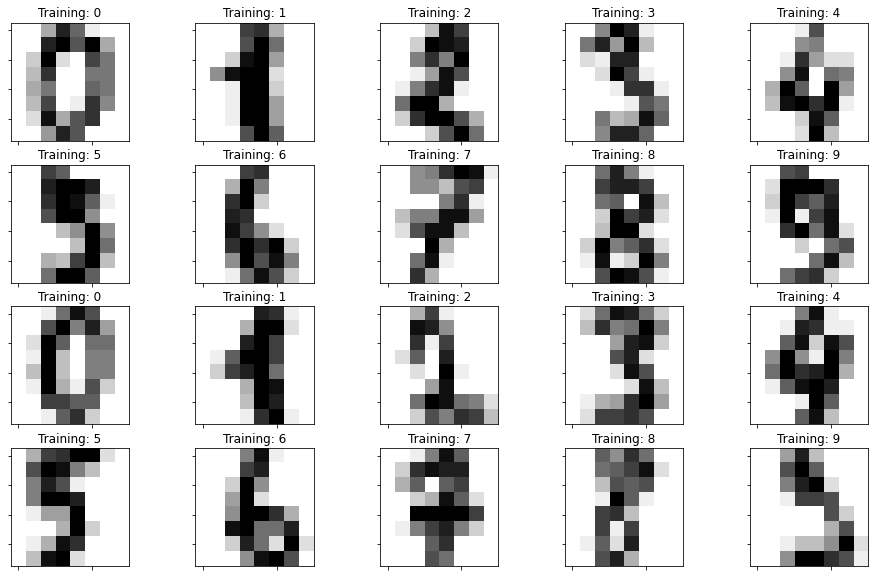

In [6]:
## visualizando el dataset
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % digits.target[i])
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")

In [7]:
## Creando el modelo de machine learning
n_samples = digits.images.shape[0]
data = digits.images.reshape((n_samples,-1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
## diviendo el dataset en datos de entranamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)


In [9]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 0.001 )
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [10]:
predict.shape

(899,)

In [11]:
X_test[0].reshape(8,8)

array([[ 0.,  0.,  1., 11., 14., 15.,  3.,  0.],
       [ 0.,  1., 13., 16., 12., 16.,  8.,  0.],
       [ 0.,  8., 16.,  4.,  6., 16.,  5.,  0.],
       [ 0.,  5., 15., 11., 13., 14.,  0.,  0.],
       [ 0.,  0.,  2., 12., 16., 13.,  0.,  0.],
       [ 0.,  0.,  0., 13., 16., 16.,  6.,  0.],
       [ 0.,  0.,  0., 16., 16., 16.,  7.,  0.],
       [ 0.,  0.,  0., 11., 13., 12.,  1.,  0.]])

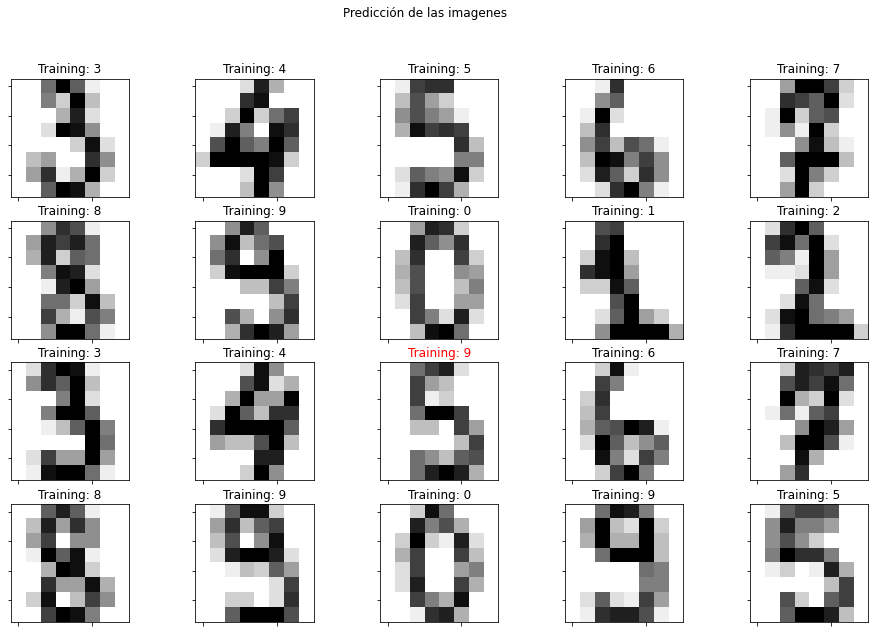

In [12]:
## visualizando de la predicción
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(X_test[i+20].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % predict[i+20], color = "black" if predict[i+20] == y_test[i+20] else "red")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Predicción de las imagenes")
plt.show()

In [13]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




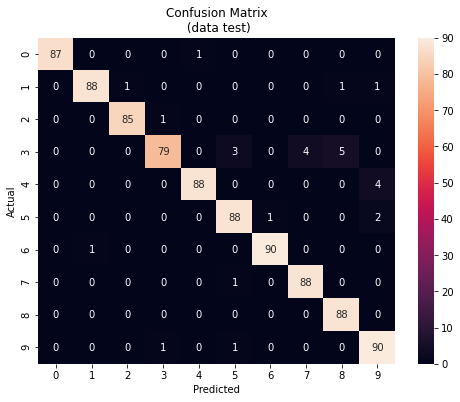

In [14]:
confusion_matrix = pd.crosstab(y_test,predict, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

### Mejorando el acurracy

In [15]:
X_train[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
## creando los filtros de kernel para el modelo
def rgb_convolve2d(image, kernel):
    image = image.reshape(8,8)
    image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [17]:
## tipos de filtros
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Edge Enhanse
kernel11 = np.array([[0, 0, 0],
                        [-1, 1, 0],
                        [0, 0, 0]])
# Repujado
kernel12 = np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
# outline
kernel13 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
# identity
kernel14 = np.array([[0, 0, 0],
                        [0, -1, 0],
                        [0, 0, 0]])

In [18]:
imagen = rgb_convolve2d(X_train[14],kernel1)
imagen = rgb_convolve2d(imagen,kernel3)


Text(0.5, 1.0, 'filtro kernel')

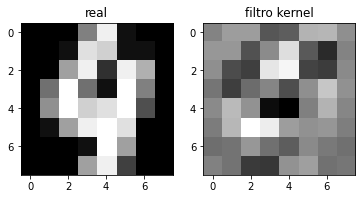

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (6,4))

axes[0].imshow(X_train[14].reshape(8,8), 
                  cmap='gray')
axes[0].set_title("real")
axes[1].imshow(imagen, 
                  cmap='gray')
axes[1].set_title("filtro kernel")

In [20]:
kernel = [kernel1,kernel2 ,kernel3 ,kernel4 ,kernel5, 
kernel6 ,kernel7 ,kernel8 ,kernel9 ,kernel10 ,kernel11,kernel12, kernel13,kernel14]

Text(0.5, 0.98, 'Tipos de kernel')

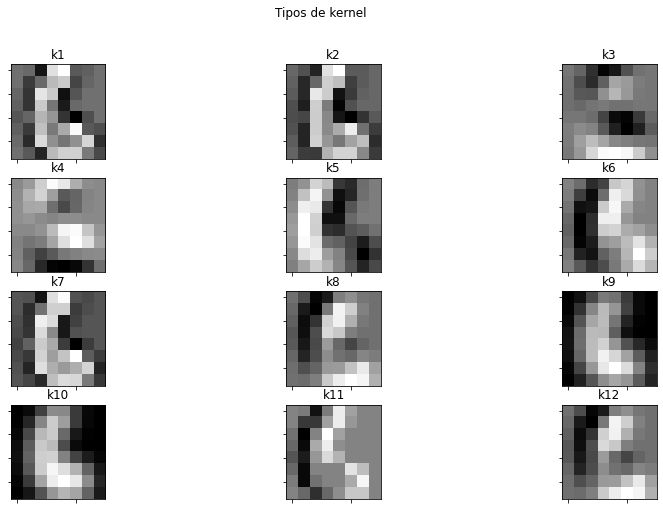

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=3,figsize = (14,8))
axes = axes.flat
for i in range(12):
    axes[i].imshow(rgb_convolve2d(X_train[26],kernel[i]), 
                    cmap='gray')
    axes[i].set_title(f"k{i+1}")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Tipos de kernel")

In [22]:
## creando los filtros de kernel para el modelo general

def rgb_kernel_convolve2d(image, kernel):
    image_k = []
    for i in range(image.shape[0]):
        image_transform = image[i].reshape(8,8)
        image_k.append(convolve2d(image_transform, kernel, 'same', boundary = 'fill',
                            fillvalue = 0))
    image_k = np.array(image_k)
    n_samples = image.shape[0]
    image_k= image_k.reshape((n_samples,-1))
    return image_k

In [23]:
## aplicando los filtros de kernel
X_train2 = rgb_kernel_convolve2d(X_train, kernel14)

X_test2 = rgb_kernel_convolve2d(X_test, kernel14)


In [65]:
X_train2 = filters.unsharp_mask(X_train, radius = 5, amount = 1)
X_test2 = filters.unsharp_mask(X_test, radius = 5, amount = 1)

c:\Users\jose2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: Images of type float must be between -1 and 1.

In [61]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 'scale',class_weight="balanced", C = 100 )
model.fit(X_train2,y_train)
predict = model.predict(X_test2)

In [62]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(C=100, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        88
           1       0.64      0.65      0.64        91
           2       0.63      0.78      0.70        86
           3       0.64      0.66      0.65        91
           4       0.79      0.84      0.81        92
           5       0.68      0.81      0.74        91
           6       0.85      0.68      0.76        91
           7       0.76      0.64      0.70        89
           8       0.63      0.35      0.45        88
           9       0.63      0.75      0.69        92

    accuracy                           0.70       899
   macro avg       0.70      0.70      0.69       899
weighted avg       0.70      0.70      0.69       899




In [26]:
from skimage.io import imread, imshow

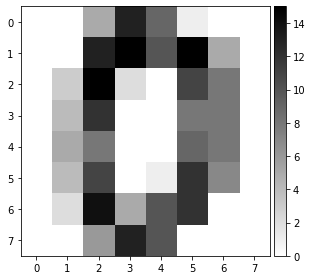

In [30]:
imshow(digits.images[0],  cmap=plt.cm.gray_r)

In [36]:
from skimage.filters import gaussian
from skimage import filters 

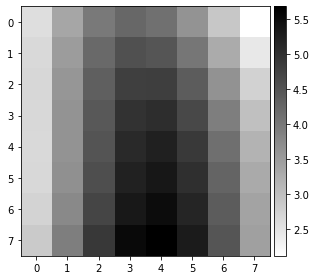

In [35]:
imshow(gaussian(digits.images[5], sigma=3),  cmap=plt.cm.gray_r)

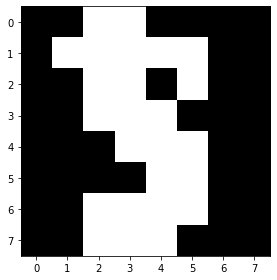

In [66]:
imshow(filters.unsharp_mask(digits.images[120], radius = 10, amount = 1),  cmap=plt.cm.gray)

In [71]:
imshow(filters.hessian(digits.images[120],sigma=1),  cmap=plt.cm.gray)

TypeError: hessian() got an unexpected keyword argument 'sigma'

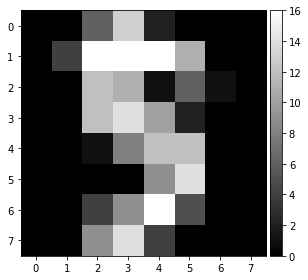

In [70]:
imshow(digits.images[120],  cmap=plt.cm.gray)

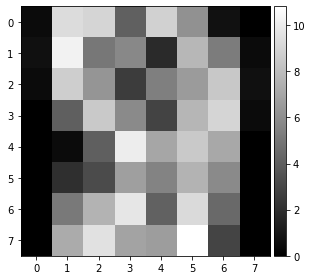

In [51]:
imshow(filters.sobel(digits.images[125]),  cmap=plt.cm.gray)

In [56]:
filters.unsharp_mask(X_train, radius = 5, amount = 1)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])